## Analysis of NYPD Bike Summonses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data source: [NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Criminal-Court-Summons-Historic-/sv2w-rv3k/data)

Downloaded data with filter `SUMMONS_CATEGORY_TYPE == 'BIKE'`

In [2]:
raw_summons = pd.read_csv('NYPD_Criminal_Court_Summons__Historic_.csv')
raw_summons.head(3)

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,X_COORDINATE_CD,Y_COORDINATE_CD,Latitude,Longitude,Lon_Lat
0,44458013,03/10/2008,BICYCLE ON SIDEWALK,19-176,Administrative Code,BIKE,25-44,M,UNKNOWN,2,BRONX,47,1021458,258089,40.874999,-73.865459,POINT (-73.86545934099996 40.87499887300004)
1,44546362,03/14/2008,BICYCLE ON SIDEWALK,19-176,Administrative Code,BIKE,25-44,M,UNKNOWN,0,BROOKLYN,79,995908,187609,40.681621,-73.957969,POINT (-73.95796900499995 40.68162066800004)
2,44627549,03/17/2008,BICYCLE ON SIDEWALK,19-176,Administrative Code,BIKE,18-24,M,UNKNOWN,0,MANHATTAN,30,997701,239900,40.825144,-73.951400,POINT (-73.95139982299997 40.825143625000074)


In [3]:
raw_summons.dtypes

SUMMONS_KEY                int64
SUMMONS_DATE              object
OFFENSE_DESCRIPTION       object
LAW_SECTION_NUMBER        object
LAW_DESCRIPTION           object
SUMMONS_CATEGORY_TYPE     object
AGE_GROUP                 object
SEX                       object
RACE                      object
JURISDICTION_CODE          int64
BORO                      object
PRECINCT_OF_OCCUR          int64
X_COORDINATE_CD            int64
Y_COORDINATE_CD            int64
Latitude                 float64
Longitude                float64
Lon_Lat                   object
dtype: object

In [4]:
df = raw_summons.copy()

df['DATE'] = pd.to_datetime(df['SUMMONS_DATE'], infer_datetime_format=True)

df['YEAR'] = df['DATE'].dt.year

df = df.drop(columns=['SUMMONS_DATE']).sort_values('DATE')

df.dtypes

SUMMONS_KEY                       int64
OFFENSE_DESCRIPTION              object
LAW_SECTION_NUMBER               object
LAW_DESCRIPTION                  object
SUMMONS_CATEGORY_TYPE            object
AGE_GROUP                        object
SEX                              object
RACE                             object
JURISDICTION_CODE                 int64
BORO                             object
PRECINCT_OF_OCCUR                 int64
X_COORDINATE_CD                   int64
Y_COORDINATE_CD                   int64
Latitude                        float64
Longitude                       float64
Lon_Lat                          object
DATE                     datetime64[ns]
YEAR                              int64
dtype: object

## Data Exploration

Summons data available from Open Data (2006 through 2016) on Bike related infractions 

In [5]:
df.OFFENSE_DESCRIPTION.unique()

array(['BICYCLE ON SIDEWALK', 'BIKE IN PARK',
       'BICYCLE INFRACTION (COMMERCIAL)', 'OPERATE BIKE ON SIDEWALK',
       'NO BELL', 'FAIL TO AFIX ID TO BIKE',
       'RIDING BIKE ON THE SIDEWALK', 'URINATING IN PUBLIC',
       'FAILURE TO COMPLY WITH SIGN', 'CONSUMPTION OF ALCOHOL',
       'NO TRIP SHEET', 'NOISE (UNREASONABLE)', 'NOISE (ENGINE EXHAUST)'],
      dtype=object)

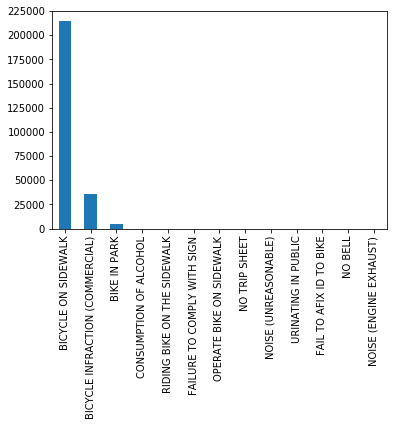

In [6]:
pd.value_counts(df['OFFENSE_DESCRIPTION']).plot.bar()

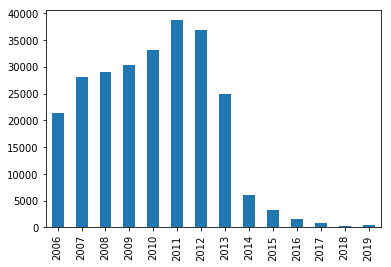

In [7]:
pd.value_counts(df['DATE'].dt.year).sort_index().plot.bar().get_figure().savefig('Bike Summons By Year.jpg', kind='jpg')

In [8]:
df.LAW_DESCRIPTION.unique()

array(['Administrative Code', 'Park Regs', 'Other'], dtype=object)

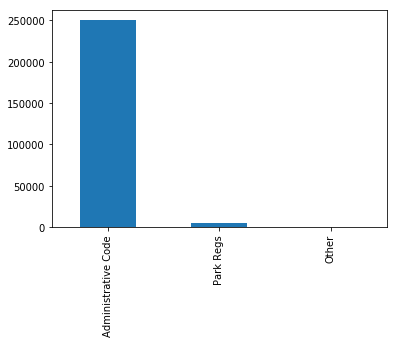

In [9]:
pd.value_counts(df['LAW_DESCRIPTION']).plot.bar()

In [10]:
df.DATE.min()

Timestamp('2006-01-01 00:00:00')

In [11]:
df.DATE.max()

Timestamp('2019-12-29 00:00:00')

      AMERICAN INDIAN/ALASKAN NATIVE  ASIAN / PACIFIC ISLANDER  BLACK  \
YEAR                                                                    
2016                               2                        96    250   
2017                               6                        82    253   
2018                               2                        17     71   
2019                               8                        33    184   

      BLACK HISPANIC  OTHER  UNKNOWN  WHITE  WHITE HISPANIC  
YEAR                                                         
2016              72    NaN      437    130             256  
2017              77    NaN       47    120             233  
2018              17    1.0        3     22              57  
2019              33    2.0        4     28             108  


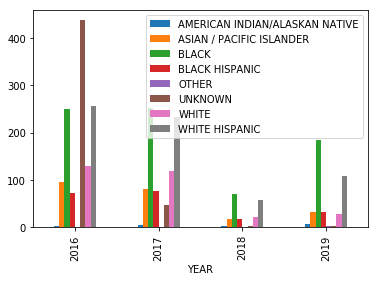

In [12]:
l = []
years = range(2016,2020)
for year in years:
    l.append(pd.crosstab(df[df['YEAR']==year]['YEAR'], df['RACE'], normalize=False))

summons_by_race = pd.concat(l, axis=0, sort=True)

print(summons_by_race)

summons_by_race.plot.bar()


BLACK OR HISPANIC

BLACK_HIS  Black/Hispanic     Other   Unknown     White
YEAR                                                   
2016             0.355911  0.294951  0.269089  0.080049
2017             0.659251  0.145199  0.055035  0.140515
2018             0.759162  0.109948  0.015707  0.115183
2019             0.812500  0.107500  0.010000  0.070000


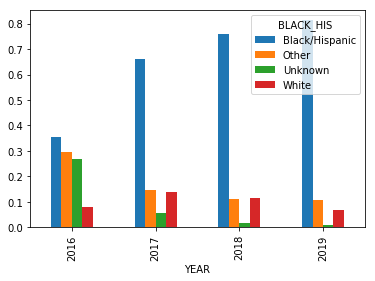

In [14]:
df = df.assign(

    BLACK_HIS = lambda dataframe: 
    dataframe['RACE'].map(lambda RACE: 
                          'Black/Hispanic' if RACE in ['BLACK', 'BLACK HISPANIC', 'HISPANIC', 'WHITE HISPANIC'] 
                          else 'White' if RACE=='WHITE'
                          else 'Unknown' if RACE=='UNKNOWN'
                         else 'Other') 
)

l = []
years = range(2016,2020)
for year in years:
    l.append(pd.crosstab(df[df['YEAR']==year]['YEAR'], df['BLACK_HIS'], normalize=True))

summons_by_bh = pd.concat(l, axis=0, sort=True)

print(summons_by_bh)

summons_by_bh.plot.bar().get_figure().savefig('Bicycle Summonses By Race.jpg', kind='jpg')

In [15]:
df[df['YEAR']==2019].shape

(400, 19)

BLACK HISPANIC ASIAN WHITE OTHER

BLACK_HIS_ASIAN  Asian/PI     Black  Hispanic     Other   Unknown     White
YEAR                                                                       
2016             0.059113  0.153941  0.201970  0.235837  0.269089  0.080049
2017             0.096019  0.296253  0.362998  0.049180  0.055035  0.140515
2018             0.089005  0.371728  0.387435  0.020942  0.015707  0.115183
2019             0.082500  0.460000  0.352500  0.025000  0.010000  0.070000


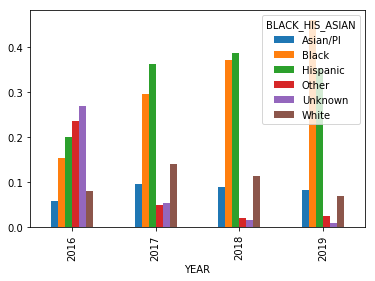

In [17]:
race_avail = df[df['YEAR']>2015]

race_avail = race_avail.assign(

    BLACK_HIS_ASIAN = lambda dataframe: 
    dataframe['RACE'].map(lambda RACE: 
                          'Hispanic' if RACE in ['BLACK HISPANIC', 'HISPANIC', 'WHITE HISPANIC'] 
                          else 'Black' if RACE=='BLACK'
                          else 'Asian/PI' if RACE=='ASIAN / PACIFIC ISLANDER'
                          else 'White' if RACE=='WHITE'
                          else 'Unknown' if RACE=='UNKNOWN'
                         else 'Other') 
)

l = []
years = range(2016,2020)
for year in years:
    l.append(pd.crosstab(race_avail[race_avail['YEAR']==year]['YEAR'], race_avail['BLACK_HIS_ASIAN'], normalize=True))

summons_by_bha = pd.concat(l, axis=0, sort=True)

print(summons_by_bha)

summons_by_bha.plot.bar().get_figure().savefig('Bicycle Summonses By Race.jpg', kind='jpg')

                                SUMMONS_KEY                                   
BLACK_HIS_ASIAN                    Asian/PI Black Hispanic Other Unknown White
OFFENSE_DESCRIPTION                                                           
BICYCLE INFRACTION (COMMERCIAL)         144    41      183   138      85    31
BICYCLE ON SIDEWALK                      70   684      614   261     352   143
BIKE IN PARK                             14    33       56    40      54   126


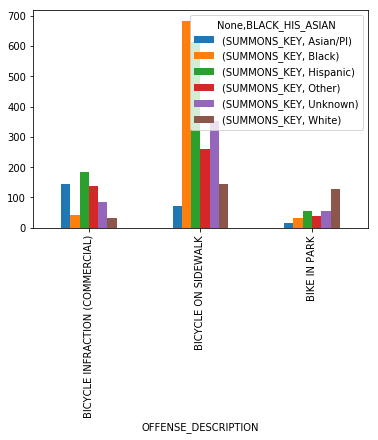

In [18]:
table = race_avail[['SUMMONS_KEY', 'OFFENSE_DESCRIPTION', 'BLACK_HIS_ASIAN']].pivot_table(columns=['BLACK_HIS_ASIAN'], index=['OFFENSE_DESCRIPTION'], aggfunc=('count'))
print(table)
table.plot.bar().get_figure().savefig('Infraction Type By Race 2016-2019.jpg', kind='jpg')

In [22]:
table.index

Index(['BICYCLE INFRACTION (COMMERCIAL)', 'BICYCLE ON SIDEWALK',
       'BIKE IN PARK'],
      dtype='object', name='OFFENSE_DESCRIPTION')

## Analysis of NYPD Bike Summonses

In [ ]:
Alice Friedman, July 2020